         Date       Open       High        Low      Close  Adj Close  \
0  2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503   
1  2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004   
2  2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   
3  2018-02-23  74.766998  75.000000  74.324997  75.000000  75.000000   
4  2018-02-26  75.459999  76.141998  75.349998  76.097504  76.097504   

      Volume  
0  129984000  
1  126088000  
2   97162000  
3   88362000  
4   99100000  


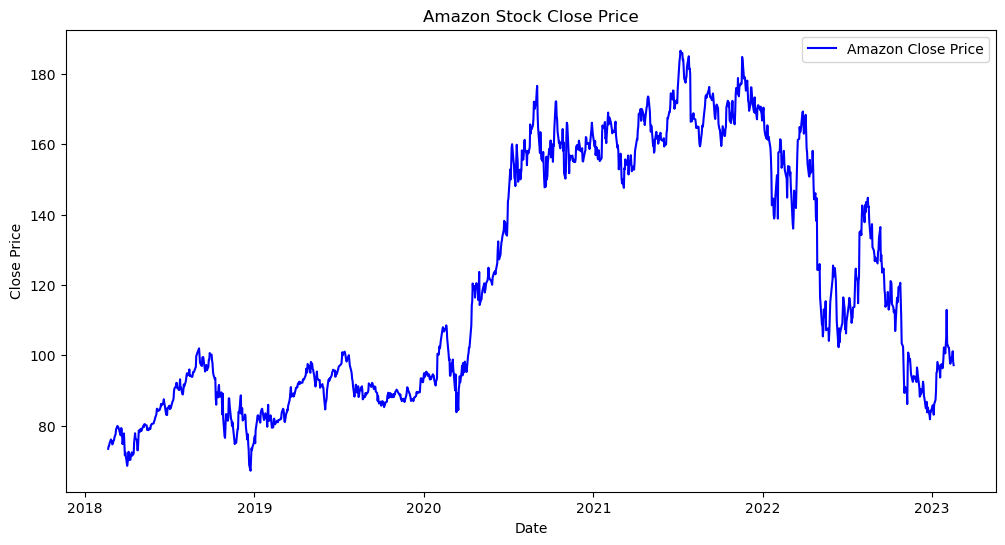

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product
import pmdarima as pm
from scipy.stats import boxcox
from numpy.fft import fft

# Load Dataset
data = pd.read_csv('AMZN.csv')

# View Data
print(data.head())

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as index
data.set_index('Date', inplace=True)

# Plot the Original Close Price Data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Amazon Close Price', color='blue')
plt.title('Amazon Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


<Figure size 1000x500 with 0 Axes>

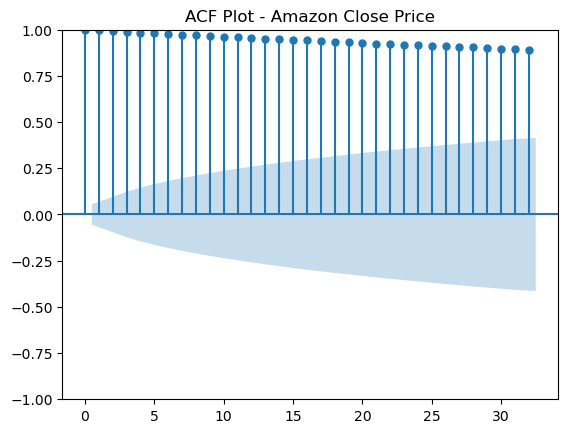

<Figure size 1000x500 with 0 Axes>

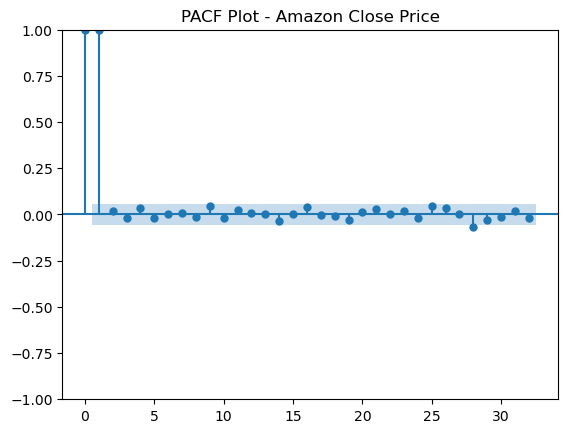

Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.657808991333171
p-value: 0.4529710546516684
Critical Values:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275


In [2]:
# ACF and PACF Plots for Amazon Close Price
plt.figure(figsize=(10, 5))
plot_acf(data['Close'])
plt.title('ACF Plot - Amazon Close Price')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(data['Close'])
plt.title('PACF Plot - Amazon Close Price')
plt.show()

# Augmented Dickey-Fuller (ADF) Test for Stationarity
adf_result = adfuller(data['Close'])

print('Augmented Dickey-Fuller Test Results:')
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')


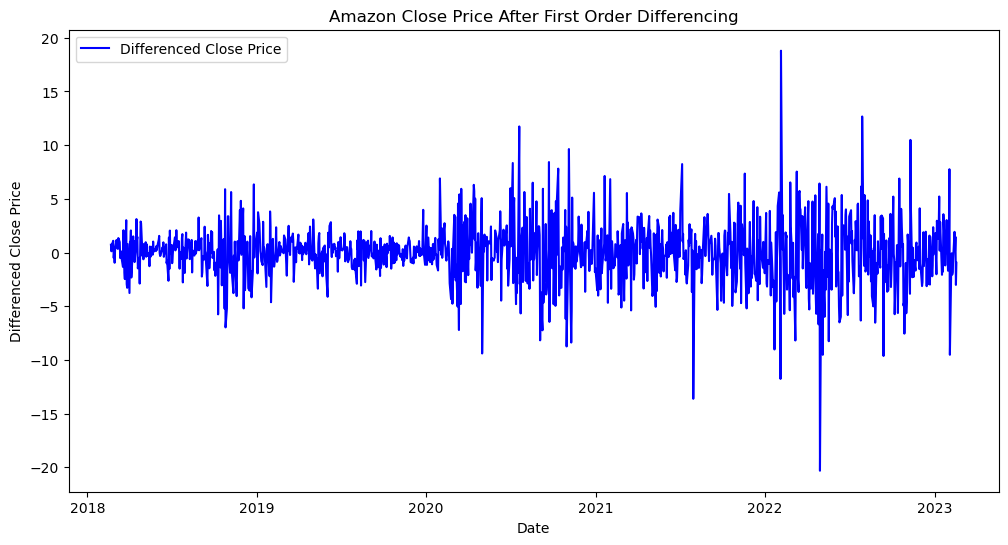

ADF Test Results After First Order Differencing:
ADF Statistic: -36.25077933242773
p-value: 0.0
Critical Values:
	1%: -3.4355629707955395
	5%: -2.863842063387667
	10%: -2.567995644141416

Optimal Lambda for Box-Cox Transformation: -0.3699998709183637


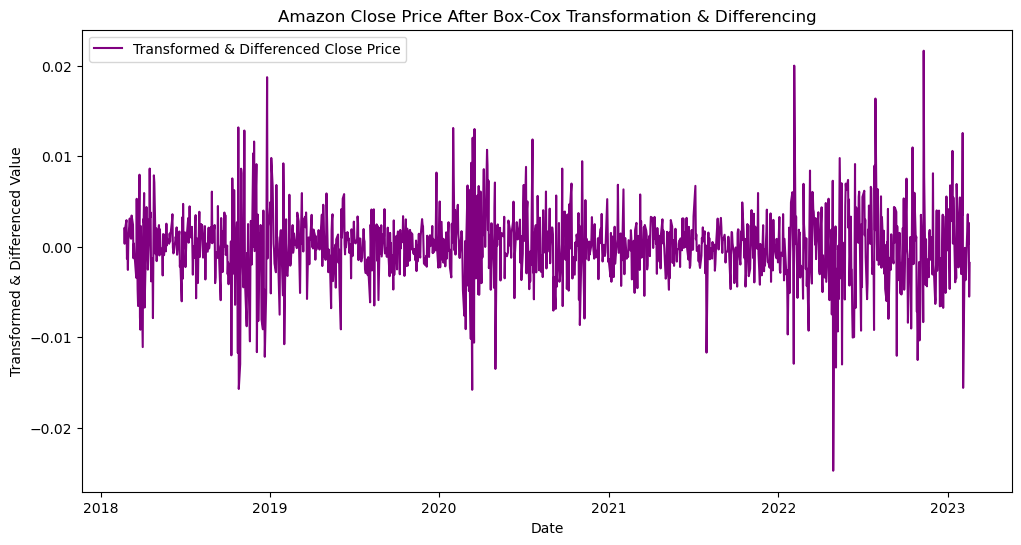


ADF Test Results After Box-Cox Transformation & Differencing:
ADF Statistic: -13.829652353331426
p-value: 7.634281178003457e-26
Critical Values:
	1%: -3.435592223709696
	5%: -2.8638549702604803
	10%: -2.56800251776


In [3]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

# First Order Differencing on Original Close Price
data_diff_original = data['Close'].diff().dropna()

# Plot Differenced Data
plt.figure(figsize=(12, 6))
plt.plot(data_diff_original, label='Differenced Close Price', color='blue')
plt.title('Amazon Close Price After First Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

# ADF Test on Differenced Data (Without Transformation)
adf_result_original = adfuller(data_diff_original)

print('ADF Test Results After First Order Differencing:')
print(f'ADF Statistic: {adf_result_original[0]}')
print(f'p-value: {adf_result_original[1]}')
print('Critical Values:')
for key, value in adf_result_original[4].items():
    print(f'\t{key}: {value}')

# Box-Cox Transformation on Original Close Price
data_transformed, lam = boxcox(data['Close'])

print(f'\nOptimal Lambda for Box-Cox Transformation: {lam}')

# First Order Differencing on Transformed Data
data_diff_transformed = pd.Series(data_transformed, index=data.index).diff().dropna()

# Plot Transformed & Differenced Data
plt.figure(figsize=(12, 6))
plt.plot(data_diff_transformed, label='Transformed & Differenced Close Price', color='purple')
plt.title('Amazon Close Price After Box-Cox Transformation & Differencing')
plt.xlabel('Date')
plt.ylabel('Transformed & Differenced Value')
plt.legend()
plt.show()

# ADF Test on Transformed & Differenced Data
adf_result_transformed = adfuller(data_diff_transformed)

print('\nADF Test Results After Box-Cox Transformation & Differencing:')
print(f'ADF Statistic: {adf_result_transformed[0]}')
print(f'p-value: {adf_result_transformed[1]}')
print('Critical Values:')
for key, value in adf_result_transformed[4].items():
    print(f'\t{key}: {value}')


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Define p, d, q ranges for ARIMA
p = d = q = range(0, 8)

# Create parameter combinations with d=1 (since we differenced once)
pdq = list(product(p, [1], q))

# Store AIC values and corresponding parameters
aic_values = []
params = []

# Grid Search for Best (p,d,q)
for param in pdq:
    try:
        model = ARIMA(data_transformed, order=param)
        model_fit = model.fit()
        aic_values.append(model_fit.aic)
        params.append(param)
    except:
        continue

# Best Parameters based on Minimum AIC
best_param_manual = params[np.argmin(aic_values)]

print(f'Best ARIMA(p,d,q) Parameters (Manual Search) for Amazon Close Price: {best_param_manual}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

Best ARIMA(p,d,q) Parameters (Manual Search) for Amazon Close Price: (0, 1, 0)


In [5]:
import pmdarima as pm

# Auto ARIMA Model on Amazon Close Price
auto_model = pm.auto_arima(data['Close'],
                           seasonal=False,   
                           trace=True,       
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print Best (p,d,q) Parameters selected by Auto ARIMA
print(f'Best ARIMA(p,d,q) Parameters (Auto ARIMA) for Amazon Close Price: {auto_model.order}')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6124.257, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6132.580, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6133.913, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6133.946, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6130.639, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6134.711, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6134.812, Time=0.76 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6125.980, Time=2.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6125.995, Time=2.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6133.629, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6135.059, Time=0.67 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6135.406, Time=0.76 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6127.282, Time=2.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6122.315, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[0]          

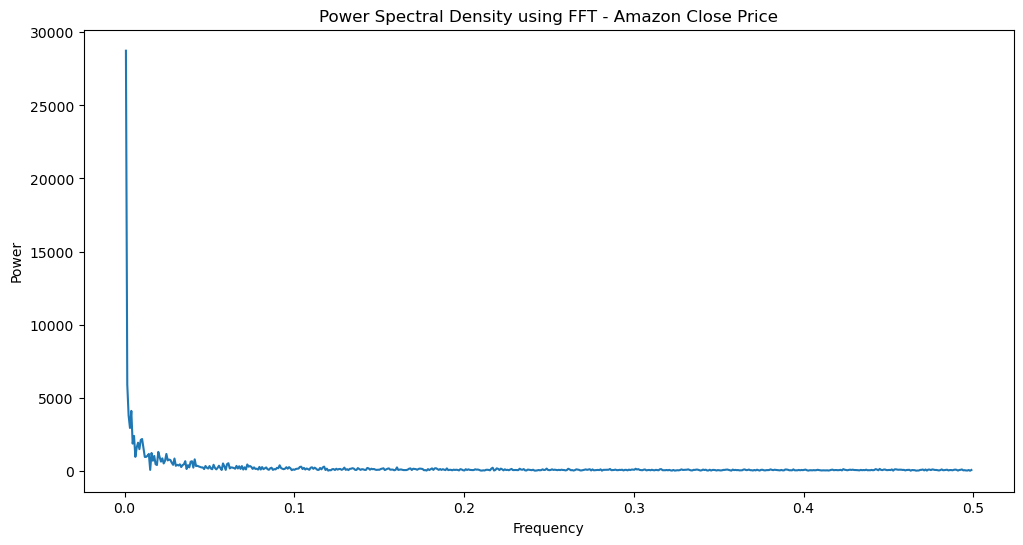

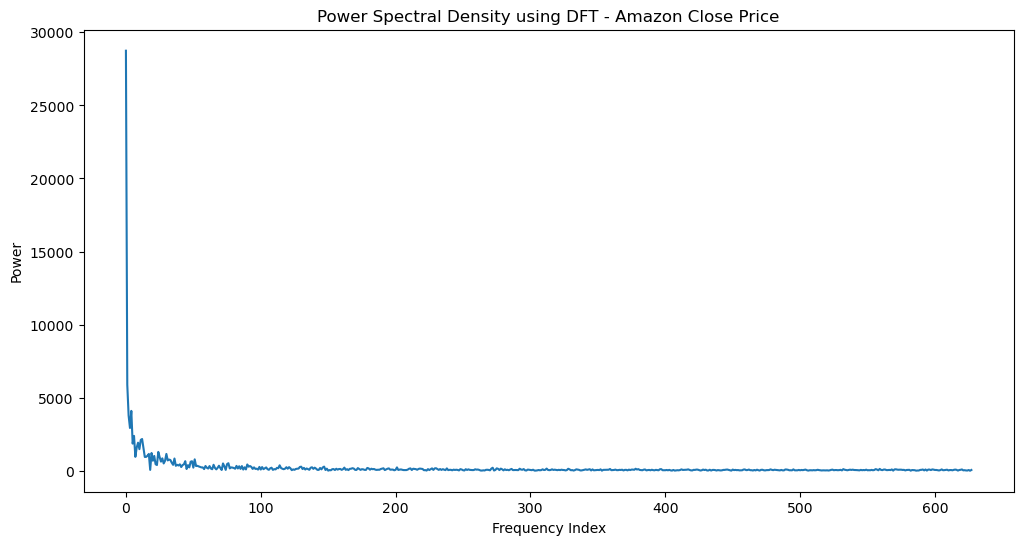

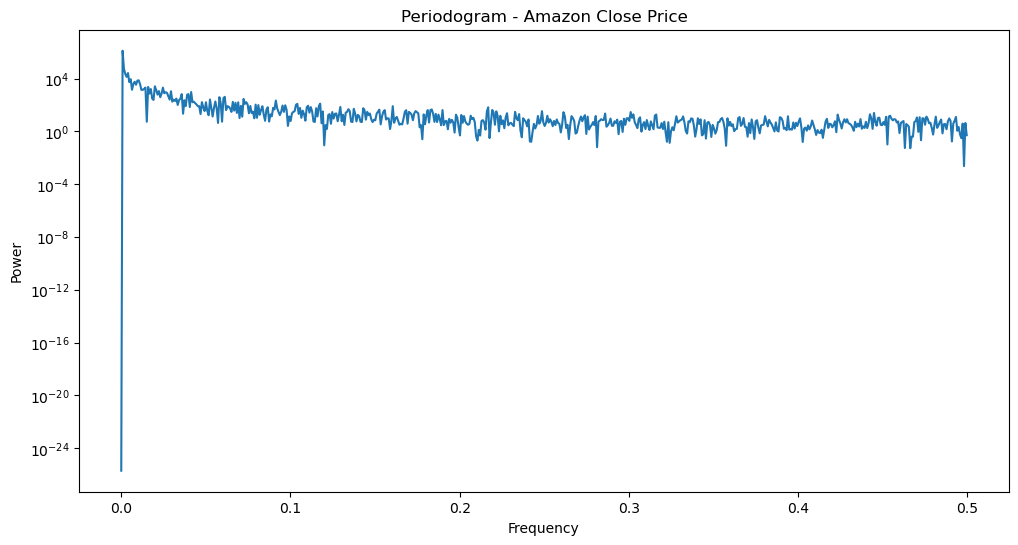

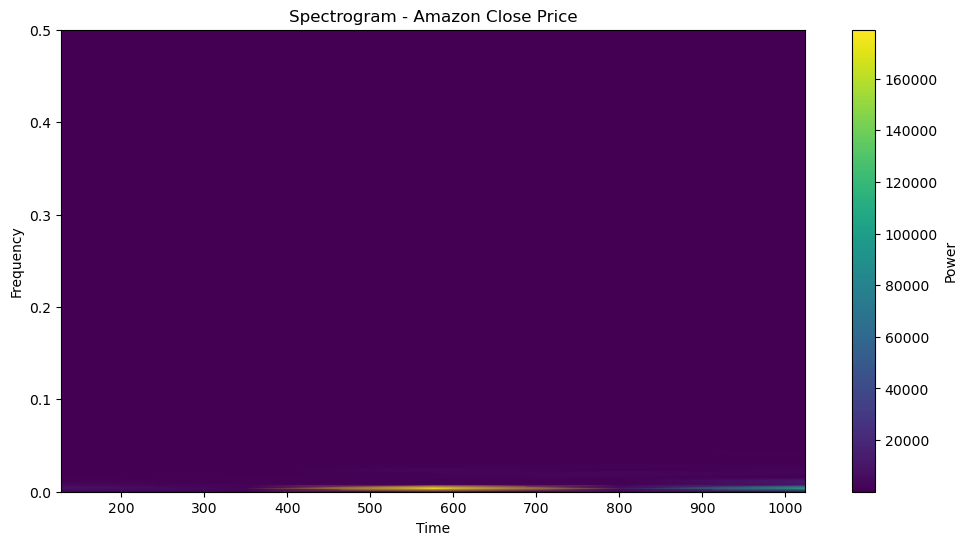

In [7]:
from scipy.signal import periodogram, spectrogram

# Load Amazon Close Price Series
series = data['Close'].values

# Apply FFT (Fast Fourier Transform)
fft_vals = np.fft.fft(series)
fft_freq = np.fft.fftfreq(len(series))

# Power from FFT
fft_power = np.abs(fft_vals)

# Plot Power Spectral Density using FFT
plt.figure(figsize=(12, 6))
plt.plot(fft_freq[1:len(fft_freq)//2], fft_power[1:len(fft_power)//2])
plt.title('Power Spectral Density using FFT - Amazon Close Price')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# Apply DFT (Manual Discrete Fourier Transform)
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    exponent = -2j * np.pi * k * n / N
    return np.dot(np.exp(exponent), x)

dft_vals = DFT(series)
dft_power = np.abs(dft_vals)

# Plot Power Spectral Density using DFT
plt.figure(figsize=(12, 6))
plt.plot(dft_power[1:len(dft_power)//2])
plt.title('Power Spectral Density using DFT - Amazon Close Price')
plt.xlabel('Frequency Index')
plt.ylabel('Power')
plt.show()

# Periodogram using scipy
freqs, power = periodogram(series)

plt.figure(figsize=(12, 6))
plt.semilogy(freqs, power)
plt.title('Periodogram - Amazon Close Price')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# Spectrogram Visualization
f, t, Sxx = spectrogram(series)

plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title('Spectrogram - Amazon Close Price')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Power')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:                 ARIMA(0, 1, 0)   Log Likelihood                5160.265
Date:                Thu, 10 Apr 2025   AIC                         -10318.530
Time:                        23:41:20   BIC                         -10313.393
Sample:                             0   HQIC                        -10316.600
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.601e-05   3.68e-07     43.442      0.000    1.53e-05    1.67e-05
Ljung-Box (L1) (Q):                   1.77   Jarque-Bera (JB):               840.35
Prob(Q):                              0.18   Pr

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


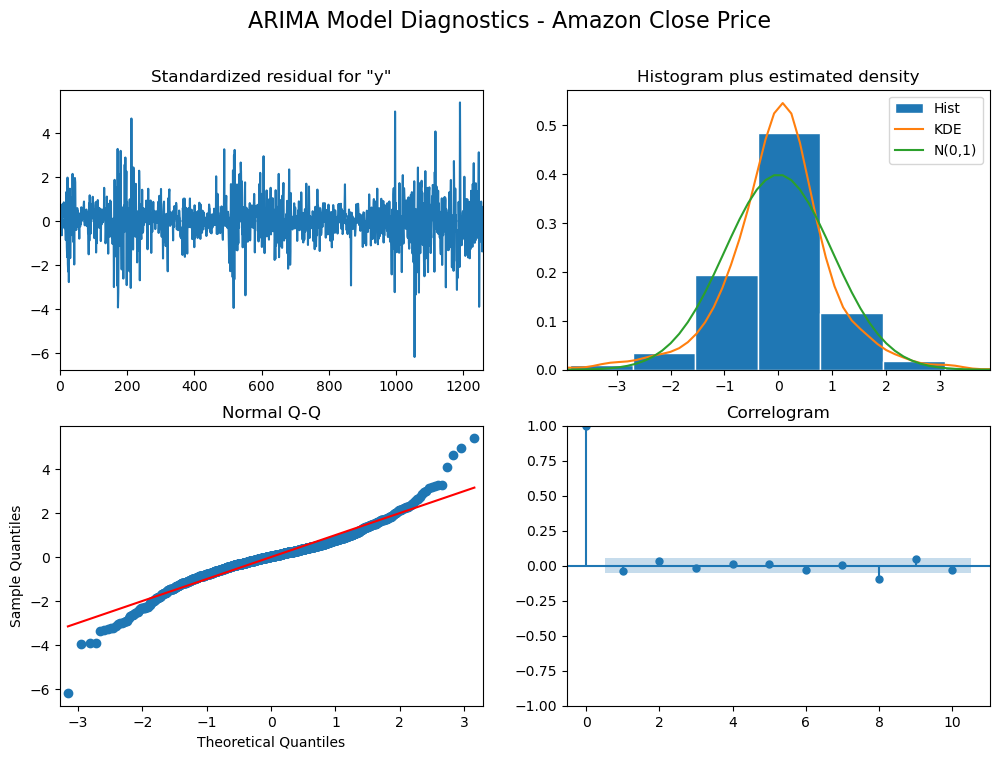

In [6]:
# Final ARIMA Model on Transformed Amazon Close Price
model_final = ARIMA(data_transformed, order=best_param_manual)

# Fit the Model
model_fit = model_final.fit()

# Model Summary
print(model_fit.summary())

# Diagnostic Plots (Residual Analysis)
model_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle('ARIMA Model Diagnostics - Amazon Close Price', fontsize=16)
plt.show()

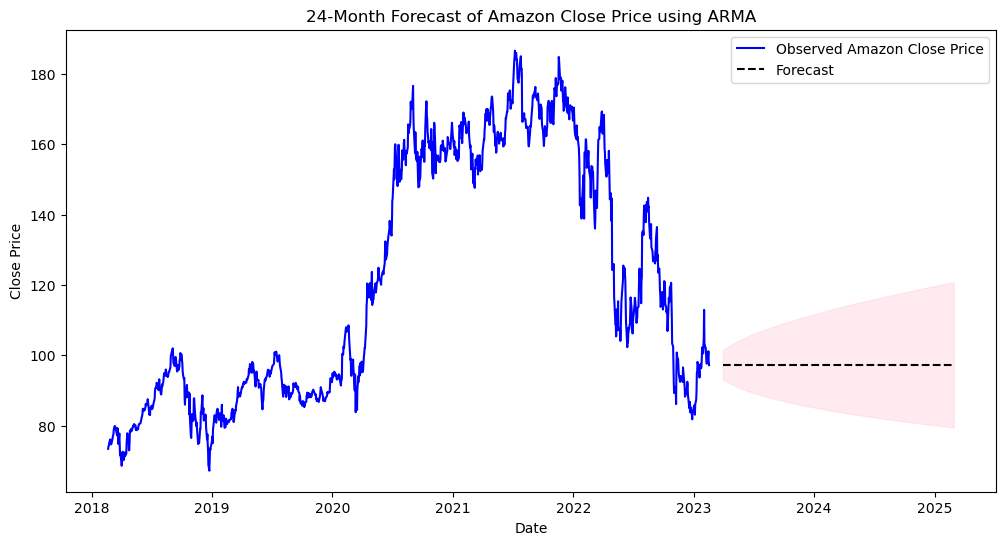

In [29]:
from scipy.special import inv_boxcox  
# Forecast for next 24 periods (months)
n_forecast = 24

forecast = model_fit.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create Forecast Index
forecast_index = pd.date_range(start=data.index[-1], periods=n_forecast + 1, freq='M')[1:]

# Inverse Box-Cox Transformation to get forecast in original scale
forecast_mean_inv = inv_boxcox(forecast_mean, lam)
forecast_ci_lower = inv_boxcox(forecast_ci[:, 0], lam)
forecast_ci_upper = inv_boxcox(forecast_ci[:, 1], lam)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Observed Amazon Close Price', color='blue')

# Plot Forecast Mean
plt.plot(forecast_index, forecast_mean_inv, label='Forecast', color='black', linestyle='--')

# Plot Confidence Interval
plt.fill_between(forecast_index,
                 forecast_ci_lower,
                 forecast_ci_upper,
                 color='pink', alpha=0.3)

plt.title('24-Month Forecast of Amazon Close Price using ARMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Reset Data to Original Amazon Close Price
series = data['Close'].values.reshape(-1, 1)

# Scaling the Data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(series)

# Prepare Data for Supervised Learning
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Using previous 12 months to predict next month
sequence_length = 12  

X, y = create_sequences(scaled_data, sequence_length)

# Train-Test Split (80% Train - 20% Test)
split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (997, 12, 1)
y_train shape: (997, 1)
X_test shape: (250, 12, 1)
y_test shape: (250, 1)


In [10]:
# Build LSTM Model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the Model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM Model
history = lstm_model.fit(X_train, y_train, 
                         epochs=50, 
                         batch_size=16, 
                         validation_data=(X_test, y_test),
                         verbose=1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1436 - val_loss: 0.0036
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9827e-04 - val_loss: 0.0025
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5770e-04 - val_loss: 0.0025
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5152e-04 - val_loss: 0.0024
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


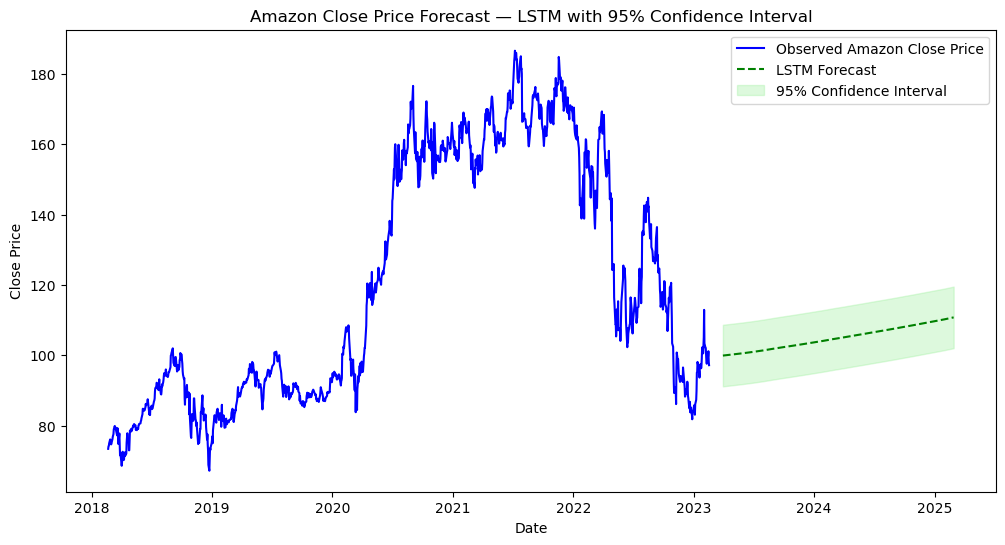

In [11]:
from sklearn.metrics import mean_squared_error

# Forecast Next 24 Months using LSTM
lstm_input = X_test[-1]
lstm_forecast = []

for _ in range(24):
    pred = lstm_model.predict(lstm_input.reshape(1, sequence_length, 1), verbose=0)
    lstm_forecast.append(pred[0][0])
    lstm_input = np.append(lstm_input[1:], pred, axis=0)

# Inverse Transform Forecast to Original Scale
lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))

# Calculate RMSE on Test Data (to estimate Confidence Interval)
lstm_test_pred = scaler.inverse_transform(lstm_model.predict(X_test).flatten().reshape(-1,1))
rmse_lstm = np.sqrt(mean_squared_error(data['Close'][-len(lstm_test_pred):], lstm_test_pred))

# Approximate 95% Confidence Interval (Forecast ± 1.96 * RMSE)
lstm_forecast_upper = lstm_forecast.flatten() + 1.96 * rmse_lstm
lstm_forecast_lower = lstm_forecast.flatten() - 1.96 * rmse_lstm

# Future Dates
future_dates = pd.date_range(start=data.index[-1], periods=25, freq='M')[1:]

# Plot Forecast with Confidence Interval
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Observed Amazon Close Price', color='blue')
plt.plot(future_dates, lstm_forecast, label='LSTM Forecast', color='green', linestyle='--')

# Plot Confidence Interval
plt.fill_between(future_dates, lstm_forecast_lower, lstm_forecast_upper, color='lightgreen', alpha=0.3, label='95% Confidence Interval')

plt.title('Amazon Close Price Forecast — LSTM with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [12]:
# Build GRU Model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the GRU Model
gru_model.compile(optimizer='adam', loss='mse')

# Train the GRU Model
history_gru = gru_model.fit(X_train, y_train, 
                            epochs=50, 
                            batch_size=16, 
                            validation_data=(X_test, y_test), 
                            verbose=1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1253 - val_loss: 0.0021
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8448e-04 - val_loss: 0.0020
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4770e-04 - val_loss: 0.0019
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.3635e-04 - val_loss: 0.0020
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4728e-04 - val_loss: 0.0018
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4435e-04 - val_loss: 0.0017
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6404e-04 - val_loss: 0.0016
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0589e-04 - val_loss: 0.0016
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3781e-04 - val_loss: 0.0015
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3990e-04 - val_loss: 0.0015
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8630e-04 - val_loss: 0.0016
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


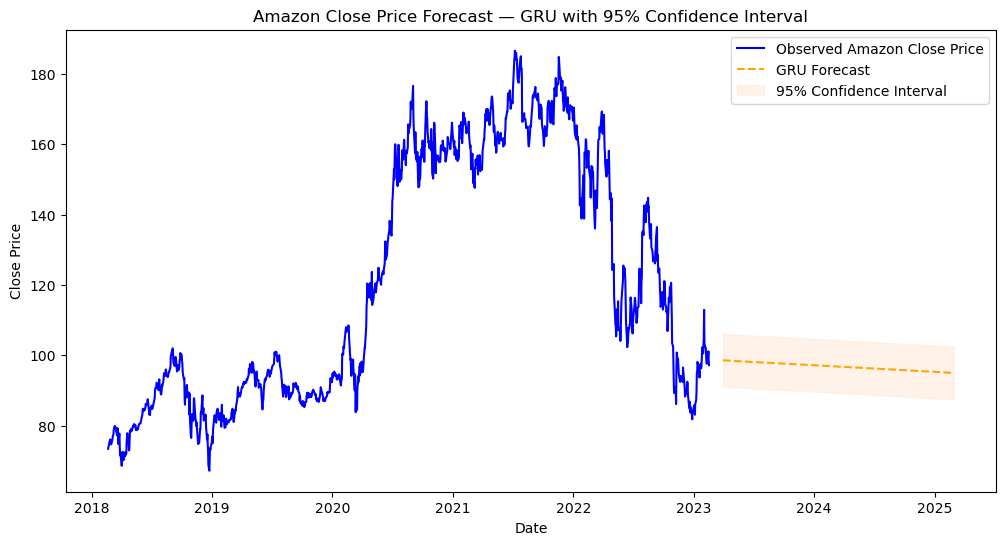

In [13]:
from sklearn.metrics import mean_squared_error

# Forecast Next 24 Months using GRU
gru_input = X_test[-1]  # Last known sequence
gru_forecast = []

for _ in range(24):
    pred = gru_model.predict(gru_input.reshape(1, sequence_length, 1), verbose=0)
    gru_forecast.append(pred[0][0])
    gru_input = np.append(gru_input[1:], pred, axis=0)

# Inverse Transform Forecast to Original Scale
gru_forecast = scaler.inverse_transform(np.array(gru_forecast).reshape(-1, 1))

# Calculate RMSE on Test Data for GRU
gru_test_pred = scaler.inverse_transform(gru_model.predict(X_test).flatten().reshape(-1, 1))
rmse_gru = np.sqrt(mean_squared_error(data['Close'][-len(gru_test_pred):], gru_test_pred))

# Approximate 95% Confidence Interval
gru_forecast_upper = gru_forecast.flatten() + 1.96 * rmse_gru
gru_forecast_lower = gru_forecast.flatten() - 1.96 * rmse_gru

# Plot Forecast with Confidence Interval
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Observed Amazon Close Price', color='blue')
plt.plot(future_dates, gru_forecast, label='GRU Forecast', color='orange', linestyle='--')

# Plot Confidence Interval
plt.fill_between(future_dates, gru_forecast_lower, gru_forecast_upper, color='peachpuff', alpha=0.3, label='95% Confidence Interval')

plt.title('Amazon Close Price Forecast — GRU with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define MAPE Function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Inverse Transform LSTM and GRU Predictions to Original Scale
lstm_pred = scaler.inverse_transform(lstm_model.predict(X_test)).flatten()
gru_pred = scaler.inverse_transform(gru_model.predict(X_test)).flatten()

# ARIMA Predictions 
arma_pred = inv_boxcox(model_fit.predict(start=0, end=len(data_transformed)-1), lam)

# Actual Data for LSTM & GRU Evaluation 
actual = data['Close'][-len(lstm_pred):].values  # Amazon Close Price

# ------------------------
# ARIMA Metrics
print("\n--- ARIMA Model Metrics ---")
print(f'ARIMA RMSE: {np.sqrt(mean_squared_error(data["Close"], arma_pred)):.2f}')
print(f'ARIMA MAE: {mean_absolute_error(data["Close"], arma_pred):.2f}')
print(f'ARIMA MAPE: {mape(data["Close"], arma_pred):.2f}%')

# ------------------------
# LSTM Metrics
print("\n--- LSTM Model Metrics ---")
print(f'LSTM RMSE: {np.sqrt(mean_squared_error(actual, lstm_pred)):.2f}')
print(f'LSTM MAE: {mean_absolute_error(actual, lstm_pred):.2f}')
print(f'LSTM MAPE: {mape(actual, lstm_pred):.2f}%')

# ------------------------
# GRU Metrics
print("\n--- GRU Model Metrics ---")
print(f'GRU RMSE: {np.sqrt(mean_squared_error(actual, gru_pred)):.2f}')
print(f'GRU MAE: {mean_absolute_error(actual, gru_pred):.2f}')
print(f'GRU MAPE: {mape(actual, gru_pred):.2f}%')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

--- ARIMA Model Metrics ---
ARIMA RMSE: 3.44
ARIMA MAE: 1.97
ARIMA MAPE: 1.69%

--- LSTM Model Metrics ---
LSTM RMSE: 4.46
LSTM MAE: 3.52
LSTM MAPE: 3.01%

--- GRU Model Metrics ---
GRU RMSE: 3.83
GRU MAE: 2.94
GRU MAPE: 2.50%
